In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\Z004ET6Z\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('PF-1C1.csv',parse_dates=True,index_col=0)


array([<AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>], dtype=object)

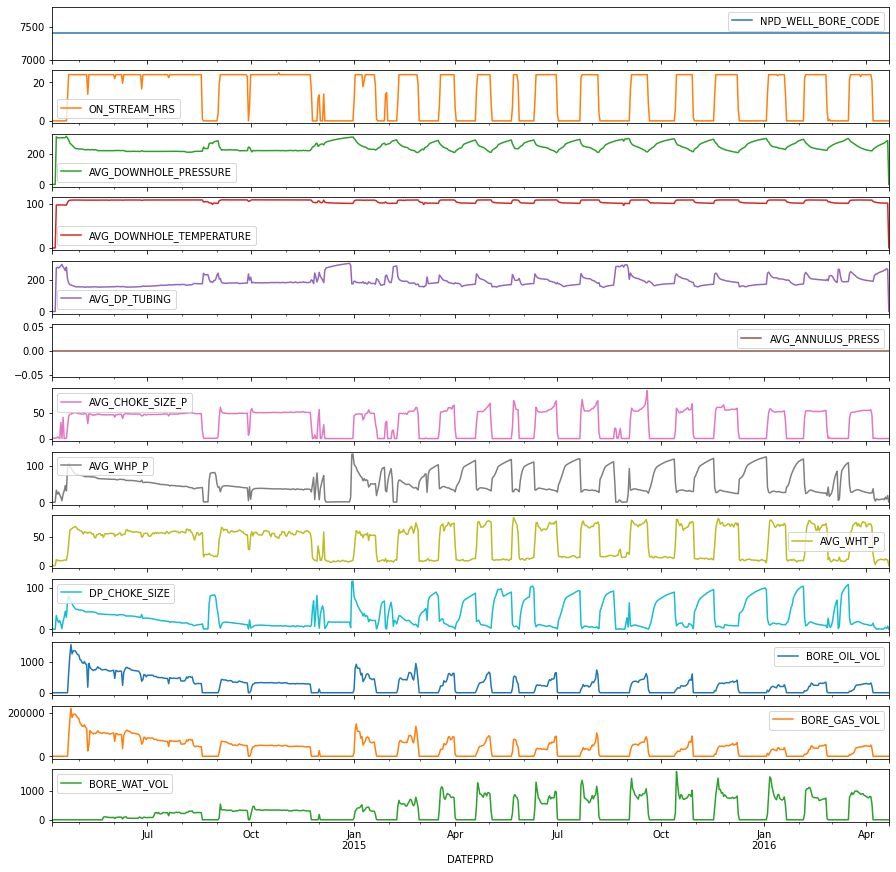

In [3]:
df.plot(figsize = (15,15),subplots= True)


<AxesSubplot:xlabel='DATEPRD'>

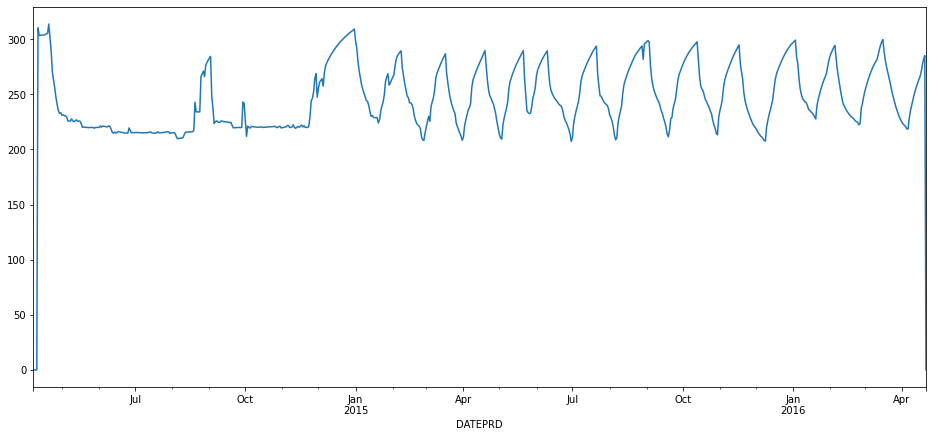

In [4]:
df['AVG_DOWNHOLE_PRESSURE'].plot(figsize = (16,7))


In [7]:
dff = df[['AVG_DOWNHOLE_PRESSURE']][16:-1]

<AxesSubplot:xlabel='DATEPRD'>

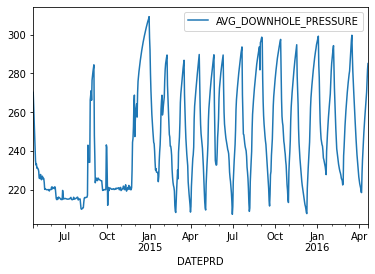

In [8]:
dff.plot()


In [9]:
#Scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1 = scaler.fit_transform(dff)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


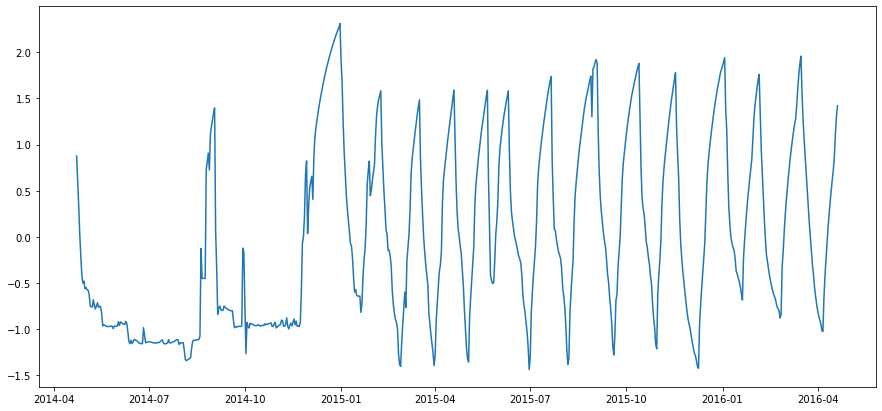

In [10]:
plt.figure(figsize=(15,7))
plt.plot(dff.index,df1)

In [11]:
w = 50

In [12]:
training_size = int(len(df1)*0.681)
test_size = len(df1) - training_size

In [13]:
train_data,test_data = df1[0:training_size+w,:],df1[training_size:len(df1),:]

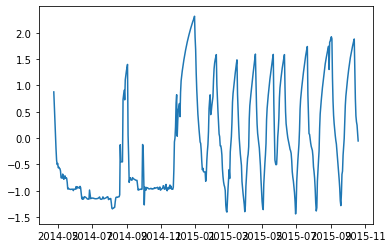

In [14]:
plt.plot(dff.index[:training_size+w],train_data)


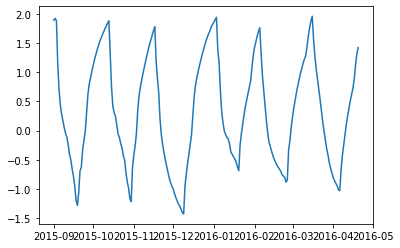

In [15]:
plt.plot(dff.index[training_size:],test_data)


In [16]:
def create_dataset(dataset,time_step):
    dataX,dataY = [],[]
    
    for i in range(len(dataset)-time_step):
        
        a = dataset[i:(i+time_step),0]
        
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        
    return np.array(dataX), np.array(dataY)

In [17]:
time_step = w
#Using 100 consecutive values predicting 101th value
#f1-------f100 = X
#f101 = y
X_train, y_train = create_dataset(train_data,time_step)
X_test, y_test = create_dataset(test_data,time_step)

In [18]:
#Making data 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
X_train.shape,X_test.shape

((496, 50, 1), (183, 50, 1))

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM 

In [22]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

In [23]:
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size = 128,verbose = 1)

Epoch 1/50
4/4 [==============================] - 1s 354ms/step - loss: 0.9813 - val_loss: 0.9445
Epoch 2/50
4/4 [==============================] - 0s 109ms/step - loss: 0.8226 - val_loss: 0.9930
Epoch 3/50
4/4 [==============================] - 0s 102ms/step - loss: 0.7400 - val_loss: 0.8126
Epoch 4/50
4/4 [==============================] - 0s 101ms/step - loss: 0.6402 - val_loss: 0.6239
Epoch 5/50
4/4 [==============================] - 0s 109ms/step - loss: 0.5491 - val_loss: 0.4548
Epoch 6/50
4/4 [==============================] - 0s 101ms/step - loss: 0.4322 - val_loss: 0.2445
Epoch 7/50
4/4 [==============================] - 0s 97ms/step - loss: 0.3405 - val_loss: 0.1233
Epoch 8/50
4/4 [==============================] - 0s 96ms/step - loss: 0.3008 - val_loss: 0.1355
Epoch 9/50
4/4 [==============================] - 0s 109ms/step - loss: 0.2584 - val_loss: 0.1319
Epoch 10/50
4/4 [==============================] - 0s 96ms/step - loss: 0.2315 - val_loss: 0.1414
Epoch 11/50
4/4 [=====

In [25]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [27]:
a = train_predict.reshape(train_predict.shape[0],)
b = test_predict.reshape(test_predict.shape[0],)
c = list(a)+list(b) # Total

In [28]:
dff

,AVG_DOWNHOLE_PRESSURE
DATEPRD,
2014-04-23,270.240
2014-04-24,262.843
2014-04-25,255.527
2014-04-26,247.199
2014-04-27,240.736
...,...
2016-04-16,266.148
2016-04-17,270.268
2016-04-18,276.869


In [29]:
t = []
for i in range(50):
    t.append(np.NaN)

In [30]:
dff['Predicted Pressure'] = t+c 

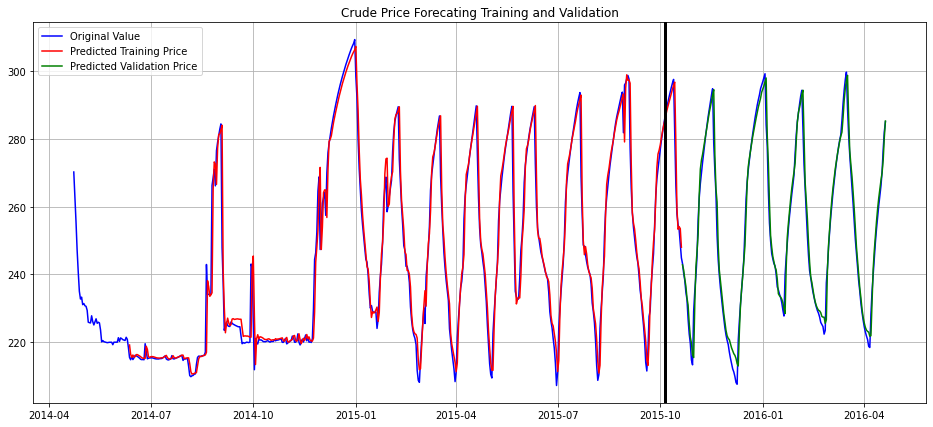

In [31]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.title("Crude Price Forecating Training and Validation")
plt.plot(dff.index,dff['AVG_DOWNHOLE_PRESSURE'],label = "Original Value",c = "blue")
plt.plot(dff[:train_predict.shape[0]+w].index,dff['Predicted Pressure'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = "Red")
plt.plot(dff[train_predict.shape[0]+w:].index,dff['Predicted Pressure'][train_predict.shape[0]+w:],label = "Predicted Validation Price",c = "Green")
plt.axvline(df.index[train_predict.shape[0]+w], color='black',lw=3)

plt.legend()

<AxesSubplot:xlabel='DATEPRD'>

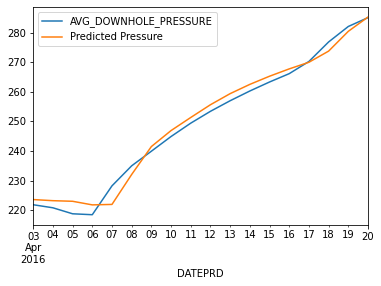

In [64]:
dff.tail(18).plot()

In [77]:
dff.tail(18)

,AVG_DOWNHOLE_PRESSURE,Predicted Pressure
DATEPRD,,
2016-04-03,221.813,223.564667
2016-04-04,220.780,223.183899
2016-04-05,218.752,222.982544
2016-04-06,218.438,221.765945
2016-04-07,228.199,221.920654
2016-04-08,234.980,232.047714
2016-04-09,239.915,241.488464
2016-04-10,244.889,246.900574
2016-04-11,249.408,251.327957


In [65]:
ddf = dff[68:]

In [68]:
x_input = test_data[-68:-18].reshape(1,-1)

In [72]:
len(x_input[0])

50

In [73]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [74]:
lst_output = []
n_steps = 50
i = 0

while i < 30:
    if(len(temp_input)>50):
        #print(temp_input)
        x_input = np.array(temp_input[1:]) # Taking x_input values from 2nd value onward, so that total value will be 100
        print('{} day input {}'.format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1)) #making tensor of 1 batch, with n rows and 1 column
        #print(x_input)
        yhat = model.predict(x_input,verbose = 1)
        print('{} day output {}'.format(i,yhat))
        temp_input.extend(yhat[0].tolist()) #Adding forecasted value to the temp_input, for further forecasting, now there are 102 values in temp_input
        temp_input = temp_input[1:] #Because after adding the above yhat[0], total number of elements in temp_input is 102, so we will select last 101 elements so that again if loop will go on running for 30 days
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i+1
    else:        #first loop will go inside this
        x_input = x_input.reshape((1,n_steps,1))  #last 100 days data, nsteps = 100 and reshaping it so that we can feed it in LSTM
        yhat = model.predict(x_input,verbose = 0) #Taking prediction from model 
        print(yhat[0])
        temp_input.extend(yhat[0].tolist()) #Adding predicted value of 101 day in temp_input, so that this value can be used for forecasting values for days starting from day 102
        print(len(temp_input))
        lst_output.extend(yhat.tolist())  #Adding 101 day forecast to Output forecasting list 
        i = i+1

[-0.8388241]
51
1 day input [-0.35298643 -0.42645716 -0.48714398 -0.54176946 -0.58746826 -0.62703224
 -0.65623686 -0.69708658 -0.75512846 -0.77919012 -0.80068031 -0.88226955
 -0.84281577 -0.32686759 -0.16563608  0.05789861  0.2380121   0.39406392
  0.53093989  0.65620748  0.77203408  0.87889725  0.97786232  1.06628434
  1.15162059  1.22255658  1.28107601  1.4334543   1.61606579  1.7633746
  1.87725423  1.95884347  1.56790573  1.27762289  1.06246386  0.8796687
  0.7072329   0.53273992  0.33455263  0.14672472 -0.00829851 -0.16310134
 -0.30368757 -0.41650187 -0.54643486 -0.64455501 -0.72897288 -0.80196604
 -0.85912627 -0.83882409]
1/1 [==============================] - 0s 991us/step
1 day output [[-0.78920215]]
2 day input [-0.42645716 -0.48714398 -0.54176946 -0.58746826 -0.62703224 -0.65623686
 -0.69708658 -0.75512846 -0.77919012 -0.80068031 -0.88226955 -0.84281577
 -0.32686759 -0.16563608  0.05789861  0.2380121   0.39406392  0.53093989
  0.65620748  0.77203408  0.87889725  0.97786232  1

In [75]:
forecast = scaler.inverse_transform(lst_output)

In [76]:
forecast = forecast.reshape(30,)

In [78]:
t_fut = pd.date_range('2016-04-03 00:00:00+00:00',periods=30)

In [79]:
dffor = pd.DataFrame({'Forecast Pressure':forecast},index = t_fut)

In [80]:
dffor

,Forecast Pressure
2016-04-03 00:00:00+00:00,223.564660
2016-04-04 00:00:00+00:00,224.915455
2016-04-05 00:00:00+00:00,227.348159
2016-04-06 00:00:00+00:00,230.697650
2016-04-07 00:00:00+00:00,234.890038
2016-04-08 00:00:00+00:00,239.836055
2016-04-09 00:00:00+00:00,245.431364
2016-04-10 00:00:00+00:00,251.550676
2016-04-11 00:00:00+00:00,258.032446
2016-04-12 00:00:00+00:00,264.659403


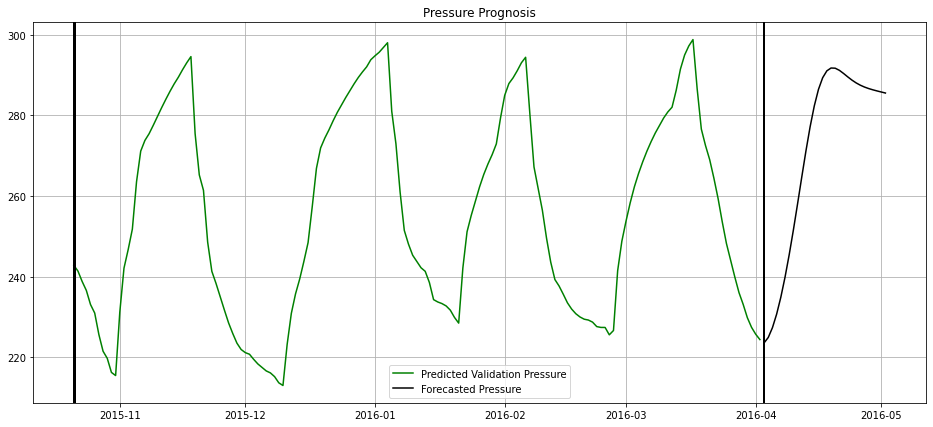

In [84]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.title("Pressure Prognosis")
#plt.plot(df.index,df['Price'],label = "Original Value",c = "blue")
#plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = "Red")
plt.plot(dff[train_predict.shape[0]+w:-18].index,dff['Predicted Pressure'][train_predict.shape[0]+w:-18],label = "Predicted Validation Pressure",c = "Green")

plt.plot(dffor.index,dffor['Forecast Pressure'],label = 'Forecasted Pressure',c = 'black')

plt.axvline(dff.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(dffor.index[0],color = 'black',lw=2)

plt.legend()

In [88]:
dffor

,Forecast Pressure
2016-04-03 00:00:00+00:00,223.564660
2016-04-04 00:00:00+00:00,224.915455
2016-04-05 00:00:00+00:00,227.348159
2016-04-06 00:00:00+00:00,230.697650
2016-04-07 00:00:00+00:00,234.890038
2016-04-08 00:00:00+00:00,239.836055
2016-04-09 00:00:00+00:00,245.431364
2016-04-10 00:00:00+00:00,251.550676
2016-04-11 00:00:00+00:00,258.032446
2016-04-12 00:00:00+00:00,264.659403


In [96]:
def daysrequired(requiredpressure,dffor):
    l = []
    if dffor['Forecast Pressure'].max()< requiredpressure:
        raise Exception("Please Enter Valid Pressure")
    else:
        for i in range(len(dffor)):
            if len(l)==0:
                if dffor.iloc[i][0]>requiredpressure:
                    pressure=dffor.iloc[i][0]
                    days= i+1
                    l.append(days)
            else:
                    break
        return days,pressure

In [101]:
dffor.iloc[1][0]

224.91545513090654

In [99]:
daysrequired(284,dffor)


(14, 286.4356062893087)

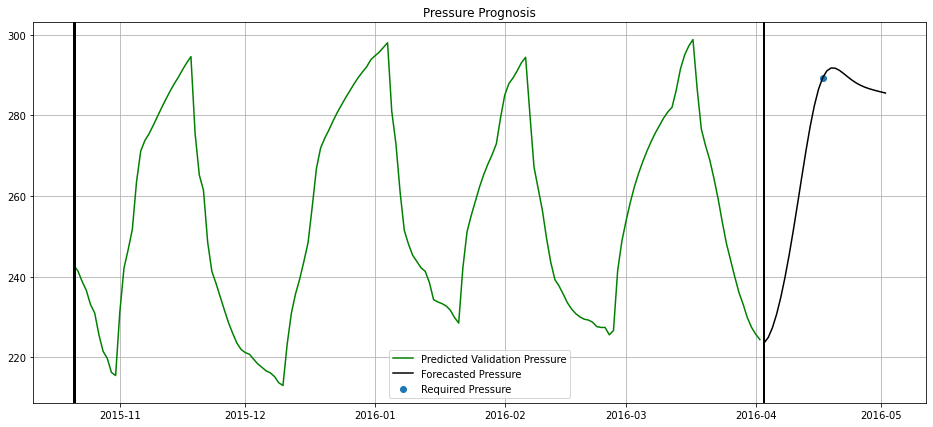

In [103]:
plt.figure(figsize=(16,7))
plt.grid(True)
plt.title("Pressure Prognosis")
#plt.plot(df.index,df['Price'],label = "Original Value",c = "blue")
#plt.plot(df[:train_predict.shape[0]+w].index,df['Predicted Price'][:train_predict.shape[0]+w],label = "Predicted Training Price",c = "Red")
plt.plot(dff[train_predict.shape[0]+w:-18].index,dff['Predicted Pressure'][train_predict.shape[0]+w:-18],label = "Predicted Validation Pressure",c = "Green")

plt.plot(dffor.index,dffor['Forecast Pressure'],label = 'Forecasted Pressure',c = 'black')
plt.scatter(dffor.index[daysrequired(284,dffor)[0]],dffor['Forecast Pressure'][daysrequired(284,dffor)[0]],label="Required Pressure")

plt.axvline(dff.index[train_predict.shape[0]+w], color='black',lw=3)
plt.axvline(dffor.index[0],color = 'black',lw=2)

plt.legend()